# **Logistic Regression:**

## **Data Exploration:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

**Load the dataset and perform exploratory data analysis (EDA).**

In [ ]:
train_data=pd.read_csv("/content/Titanic_train.csv")
test_data=pd.read_csv("/content/Titanic_test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Handle missing values.**

In [ ]:
#Check for Null Values
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
numerical_features = train_data.select_dtypes(include=['int64','float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

In [ ]:
#Handle Null Values
for feature in numerical_features:
    train_data[feature].fillna(train_data[feature].median(),inplace=True)
    if feature in test_data.columns:
        test_data[feature].fillna(test_data[feature].median(),inplace=True)

In [ ]:
for feature in categorical_features:
  train_data[feature].fillna(train_data[feature].mode()[0],inplace=True)
  if feature in test_data.columns:
    test_data[feature].fillna(test_data[feature].mode()[0],inplace=True)

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


**Summary Statistics.**

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### **Visualization**

**Histogram:**

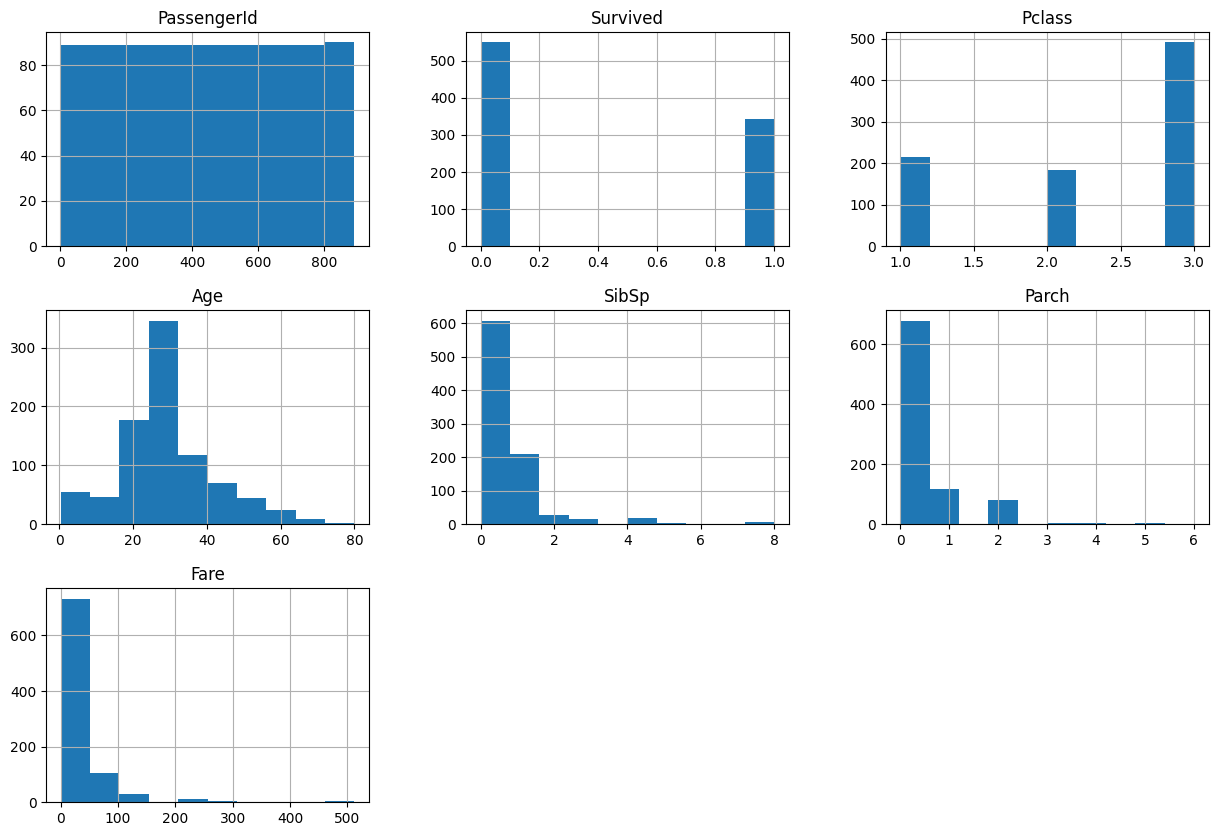

In [ ]:
train_data[numerical_features].hist(figsize=(15,10),layout=(3,3))
plt.show()

**BoxPlot:**

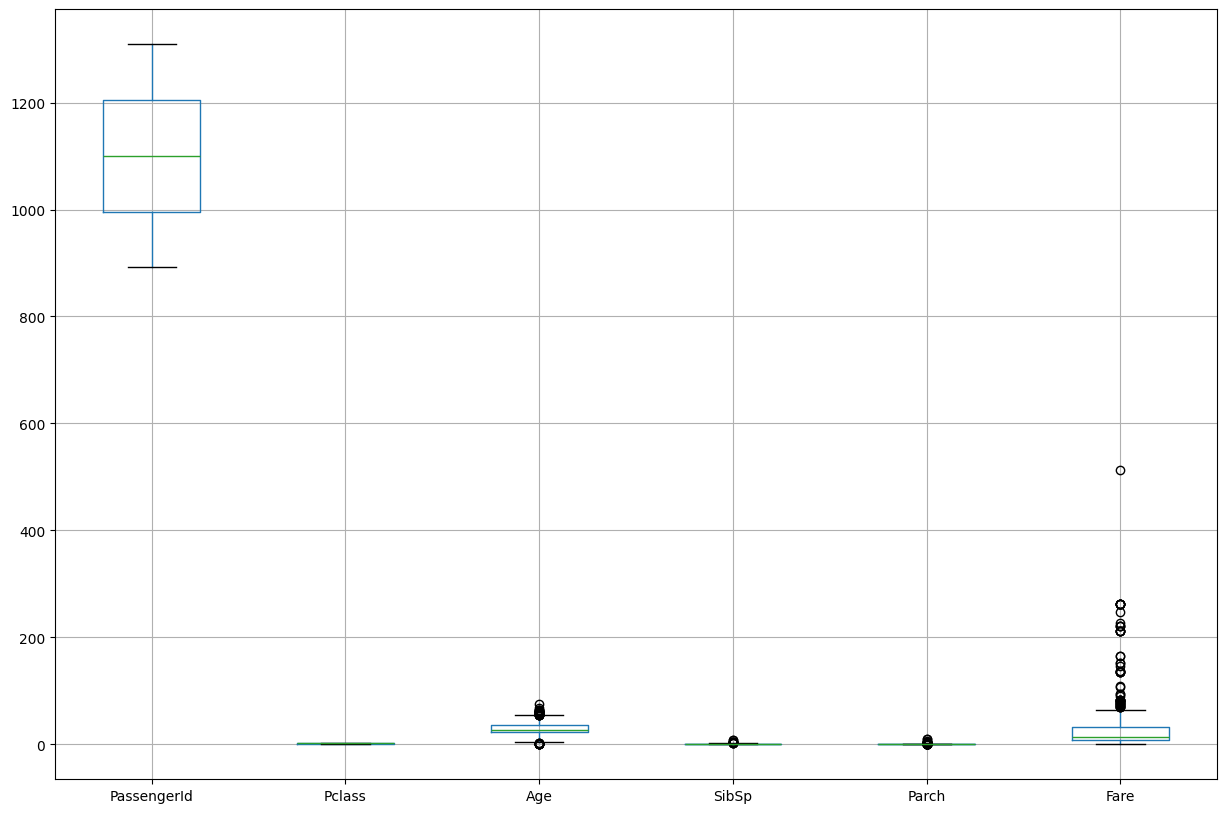

In [ ]:
numerical2_features = test_data.select_dtypes(include=['int64','float64']).columns
test_data[numerical2_features].boxplot(figsize=(15,10))
plt.show()

**PairPlot:**

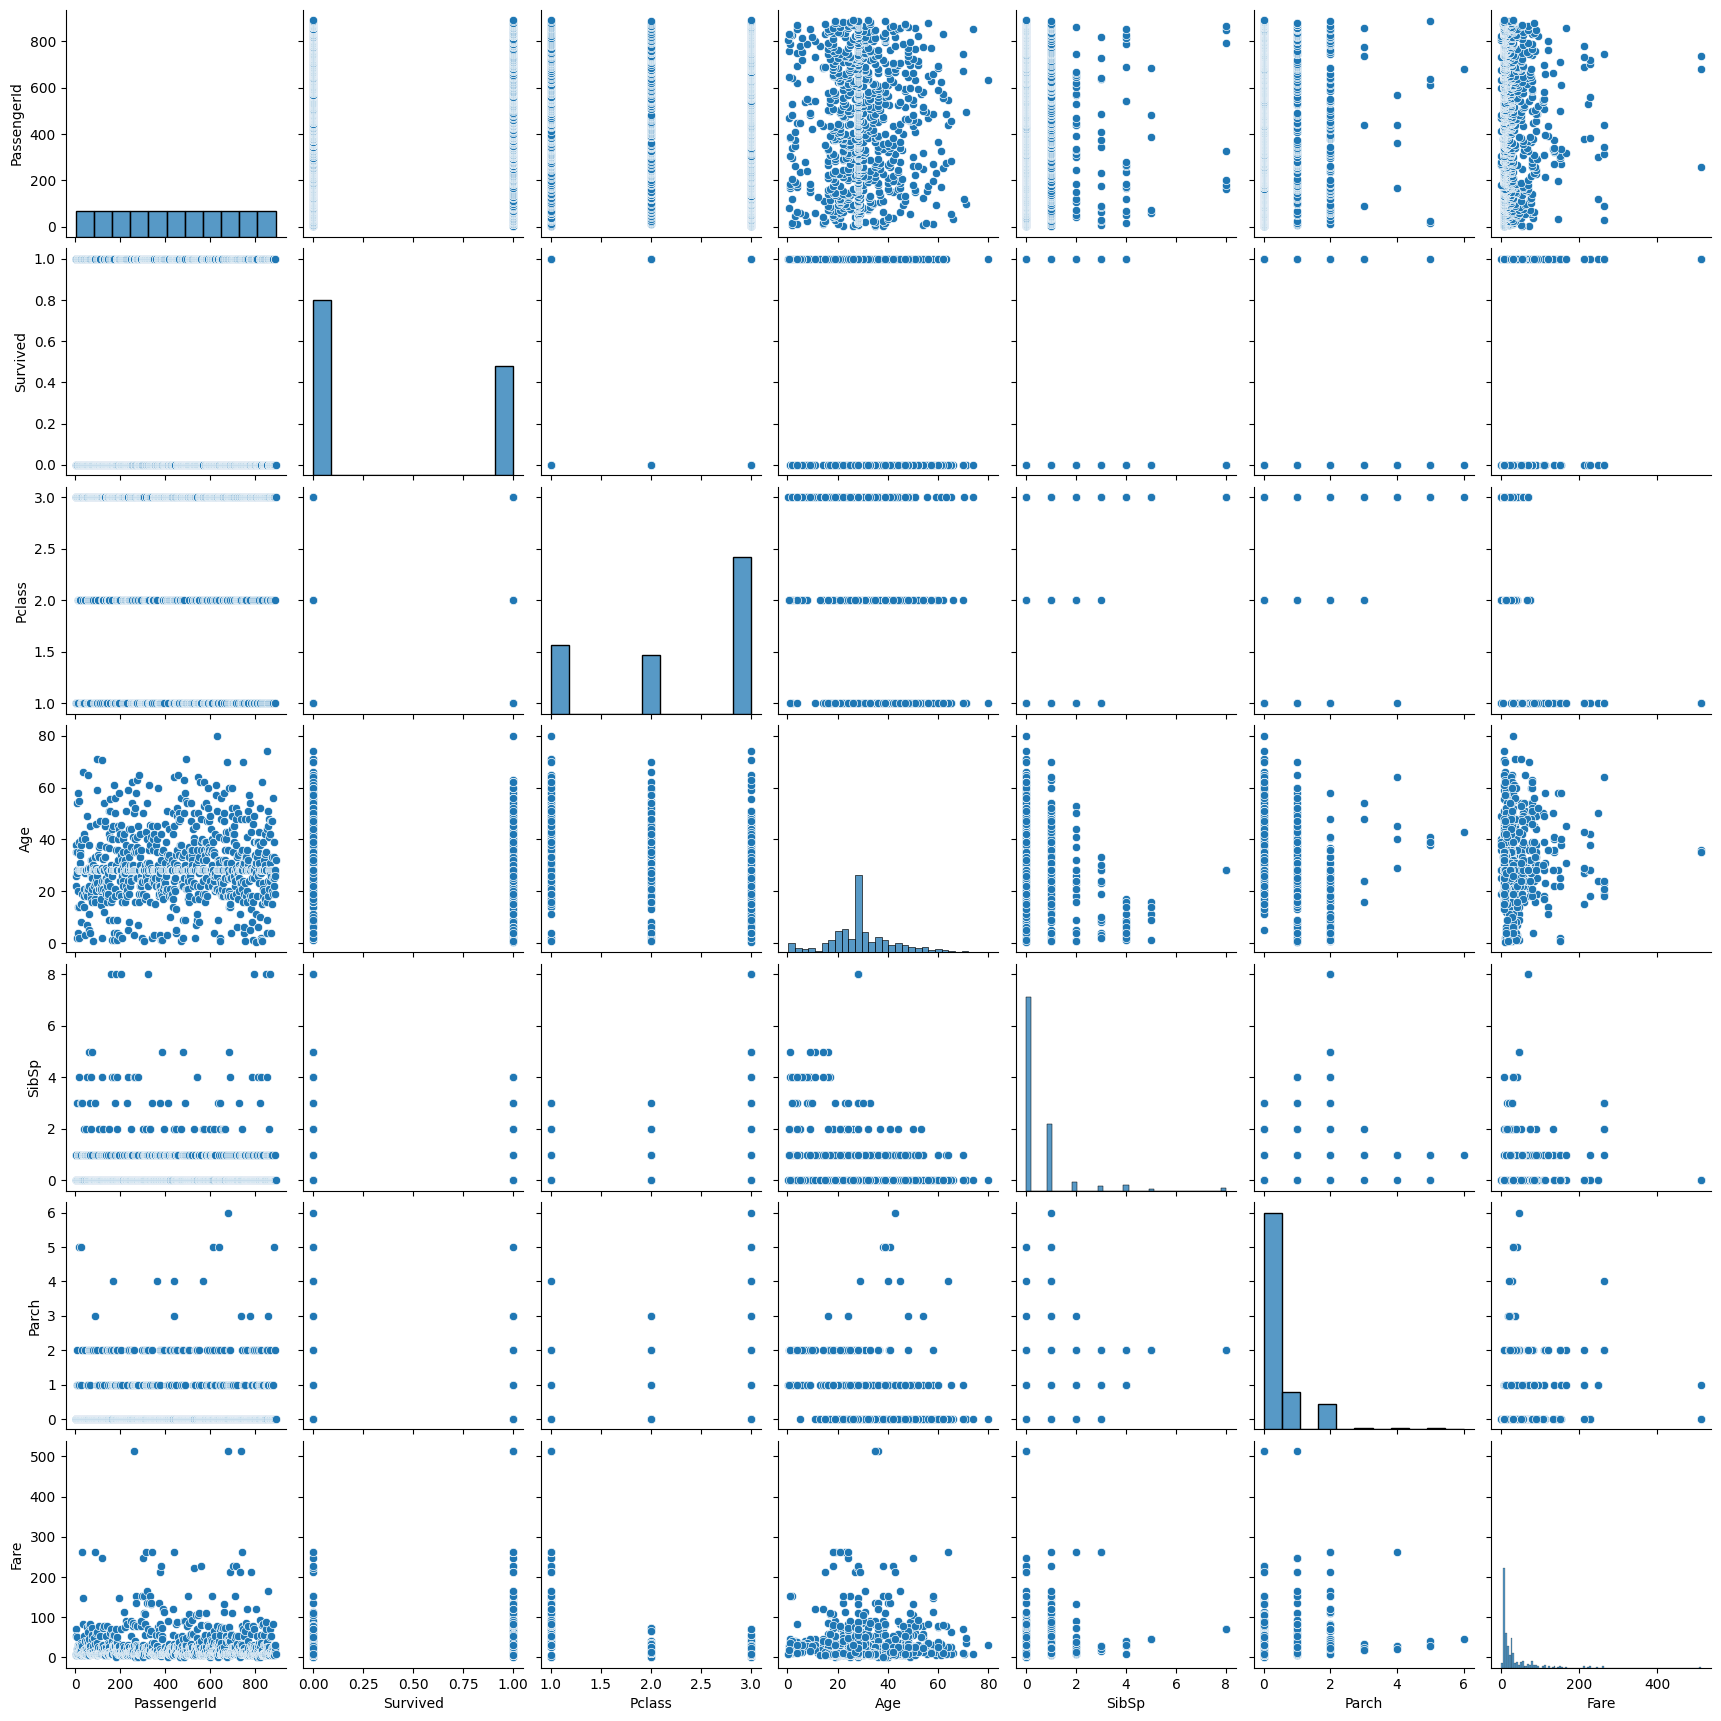

In [ ]:
sns.pairplot(train_data[numerical_features])
plt.show()

**HeatMap:**

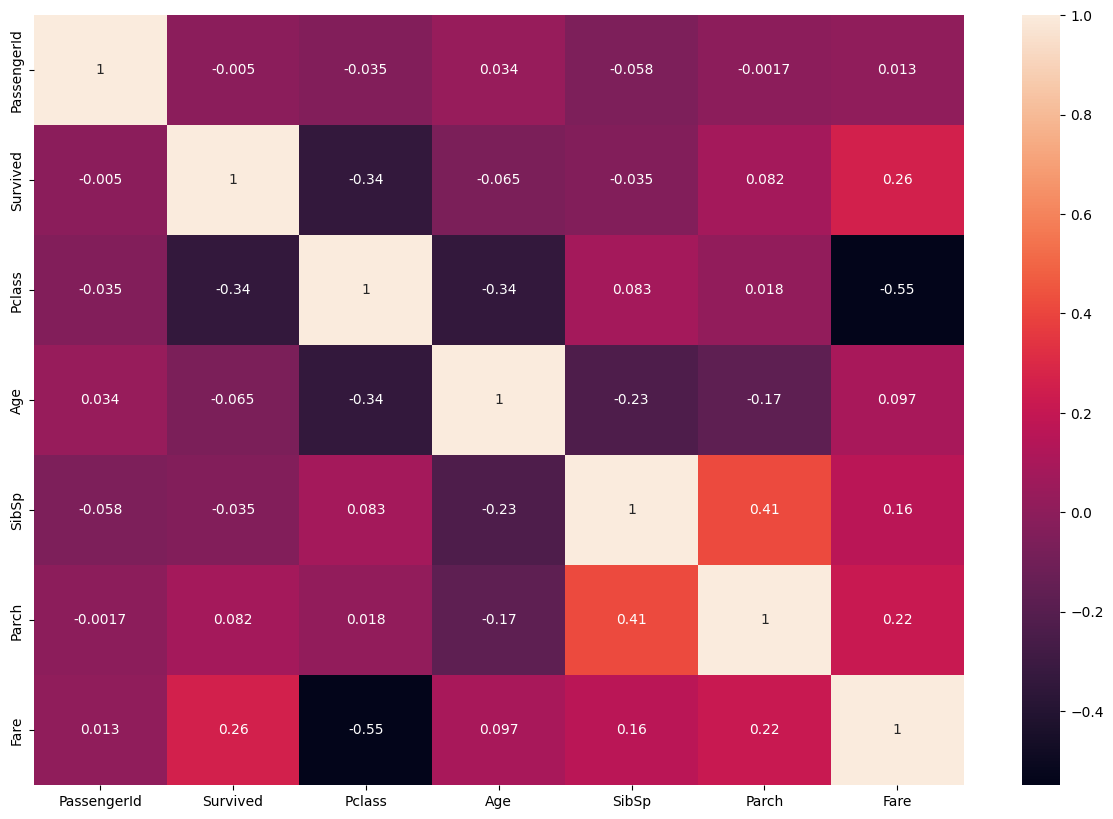

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data[numerical_features].corr(),annot=True)
plt.show()

**Encode categorical variables.**

In [ ]:
train_data=pd.get_dummies(train_data,drop_first=True)
test_data=pd.get_dummies(test_data,drop_first=True)

In [ ]:
train_data,test_data=train_data.align(test_data,join='left',axis=1)
test_data=test_data.fillna(0)

## **Model Building:**

In [ ]:
X_train  = train_data.drop('Survived',axis=1)
y_train  = train_data['Survived']

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(X_train)
y_pred_prob=model.predict_proba(X_train)[:,1]


## **Model Evaluation:**

In [ ]:
accuracy=accuracy_score(y_train,y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)

In [ ]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.9281705948372615
0.9602649006622517
0.847953216374269
0.9006211180124224


## **Interpretation:**

In [ ]:
coefficiants=pd.DataFrame(model.coef_[0],X_train.columns,columns=['Coefficients'])

**Interpret the coefficients of the logistic regression model.**

In [ ]:
print(coefficiants.sort_values(by='Coefficients',ascending=False))

                   Coefficients
Ticket_1601            1.854810
Ticket_2661            1.225767
Ticket_347077          1.086806
Ticket_C.A. 37671      1.084062
Ticket_367226          0.915475
...                         ...
Ticket_347088         -0.900412
Cabin_C22 C26         -0.913530
Ticket_349909         -0.961307
Ticket_347082         -1.124722
Sex_male              -2.788146

[1725 rows x 1 columns]


## **Interview Questions:**

**1. What is the difference between precision and recall?**

### **Precision:**
**def:** precision, also known as positive predictive value, is the ratio of correctly predicted positive observations to the total predicted positives.

**formula:**
precision = true positive/true positive + false positive

### **Recall:**

**def:** recall, also known as Sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all the observations in the actual class.

**formula:** recall = true positive/true positive + false negative

Precision focuses on the correctness of predictions, while recall focuses on ensuring all positives are found.

**2. What is cross-validation, and why is it important in binary classification?**

cross-validation is a resampling procedure used to evaluate the performance of a model on a limited data sample. the most common form of cross-validation is k-fold cross-validation.

**1.Improves Model Generalization:** Cross-validation helps ensure that the model’s performance is robust and not just tailored to a particular train-test split.  
**2.Prevents Overfitting:** By evaluating the model on different subsets of the data, cross-validation reduces the risk of overfitting to the training data.  
**3.More Reliable Performance Metrics:** Provides a more accurate estimate of the model’s performance by averaging results over multiple folds.  
**4.Model Selection and Hyperparameter Tuning:** Helps in selecting the best model and tuning hyperparameters by comparing the performance of different models/configurations on the validation sets.